## Problem # 3-3

The Redlich/Kwong Equation of State is

$P = \frac{R_g \, T}{V-b} - \frac{a}{T^{1/2} \, V \, \left(V+b\right)}$
 
where $T$ is the temperature, $V$ is the molar volume, $R_g$ is the universal gas constant, and $a$ and $b$ are compound-specific constants.  Find the molar volume of ethane for each phase that is present at $T = 77 \, °C$ and $P = 1 \, bar$.  For ethane, $a = 2.877×10^8 \, \frac{cm^6 bar K^{0.5}}{mol^2}$ and $b = 60.211 \, \frac{cm^3}{mol}$.

* Use the ideal gas law to obtain the guess of the vapor volume and 1.1*b to obtain the guess for the liquid volume.  (Graphing helps find good guesses for solver)
* You may need to include some constraints.
* IF YOU ARE STUCK ask a friend, the TA OR the instructor!  Don’t spent so much time feeling lost that you become discouraged.
* You should obtain something around 28637 $cm^3/mol$ for the vapor volume and 82.477 $cm^3/mol$ for the liquid volume.  The middle root (not required but for your information) is in between.

f(Vg): [28638.68633461]
f(V_iiq): [82.47889063]


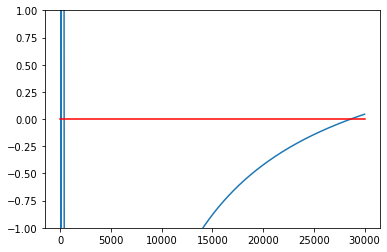

In [1]:
import numpy as np
from scipy.optimize import fsolve

# constants
TC = 77 # degC
P = 1.0 # bar
a = 2.877e8 # cm^6 bar K^0.5 / mol^2
b = 60.211  # cm^3 / mol
Rg = 83.144598 # cm^3 bar / K-mol
# derived quantities
TK = TC+273.15 # K
Vg = Rg*TK/P

# define function for fsolve
def f(V):
    return P - Rg*TK/(V-b) + a/(np.sqrt(TK)*V*(V+b))

#print(f(Vg*0.984))
V_vap = fsolve(f,Vg)
print("f(Vg):", V_vap)

V_liq = fsolve(f,1.1*b)
print("f(V_iiq):", V_liq)

n=10000
Vx=np.linspace(60,30000,n)
fx = np.empty(n)
for i in range(n):
    fx[i]=f(Vx[i])
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Vx,fx)
plt.ylim([-1,1])
plt.plot([0,30000],[0,0],'r-')

(-1.0, 1.0)

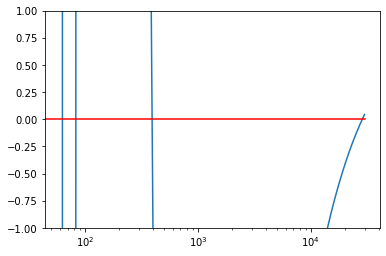

In [2]:
plt.semilogx(Vx,fx)
plt.semilogx([0,30000],[0,0],'r-')
plt.ylim([-1,1])

In [3]:
V_vap = fsolve(f,Vg)
V_liq = fsolve(f,1.1*b)

print(f'The vapor molar volume is {V_vap[0]:.2f} 𝑐𝑚3/𝑚𝑜𝑙 ')
print(f'The liquid molar volume is {V_liq[0]:.2f} 𝑐𝑚3/𝑚𝑜𝑙 ')

The vapor molar volume is 28638.69 𝑐𝑚3/𝑚𝑜𝑙 
The liquid molar volume is 82.48 𝑐𝑚3/𝑚𝑜𝑙 


(-1.0, 1.0)

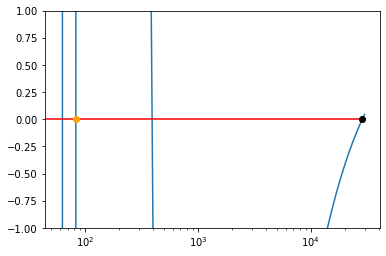

In [4]:
plt.semilogx(Vx,fx)
plt.semilogx([0,30000],[0,0],'r-')
plt.semilogx(V_liq[0], [0], 'o', color = 'orange')
plt.semilogx(V_vap[0], [0], 'o', color = 'k')
plt.ylim([-1,1])

#### The Redlich/Kwong Equation of State is

$P = \frac{R_g \, T}{V-b} - \frac{a}{T^{1/2} \, V \, \left(V+b\right)}$